In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams["figure.dpi"] = 300

In [49]:
df_batch_pl_acc = pd.concat(
    [
        pd.read_parquet("df_batch_pl_acc_cifar10_accuFalse.parquet"),
        pd.read_parquet("df_batch_pl_acc_cifar10_accuTrue.parquet"),
    ]
)
df_batch_pl_acc.method = df_batch_pl_acc.method + df_batch_pl_acc.accu
df_batch_pl_acc_fixmatch = df_batch_pl_acc[
    df_batch_pl_acc.method.str.contains("fixmatch")
]
df_batch_pl_acc_freematch = df_batch_pl_acc[
    df_batch_pl_acc.method.str.contains("freematch")
]
df_batch_pl_cov = pd.concat(
    [
        pd.read_parquet("df_batch_pl_cov_cifar10_accuFalse.parquet"),
        pd.read_parquet("df_batch_pl_cov_cifar10_accuTrue.parquet"),
    ]
)
df_batch_pl_cov.method = df_batch_pl_cov.method + df_batch_pl_cov.accu
df_batch_pl_cov_fixmatch = df_batch_pl_cov[
    df_batch_pl_cov.method.str.contains("fixmatch")
]
df_batch_pl_cov_freematch = df_batch_pl_cov[
    df_batch_pl_cov.method.str.contains("freematch")
]
df_top1 = pd.concat(
    [
        pd.read_parquet("df_top1_cifar10_accuFalse.parquet"),
        pd.read_parquet("df_top1_cifar10_accuTrue.parquet"),
    ]
)
df_top1.method = df_top1.method + df_top1.accu
df_top1_fixmatch = df_top1[df_top1.method.str.contains("fixmatch")]
df_top1_freematch = df_top1[df_top1.method.str.contains("freematch")]

/tmp/ipykernel_2235921/865377786.py:60: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


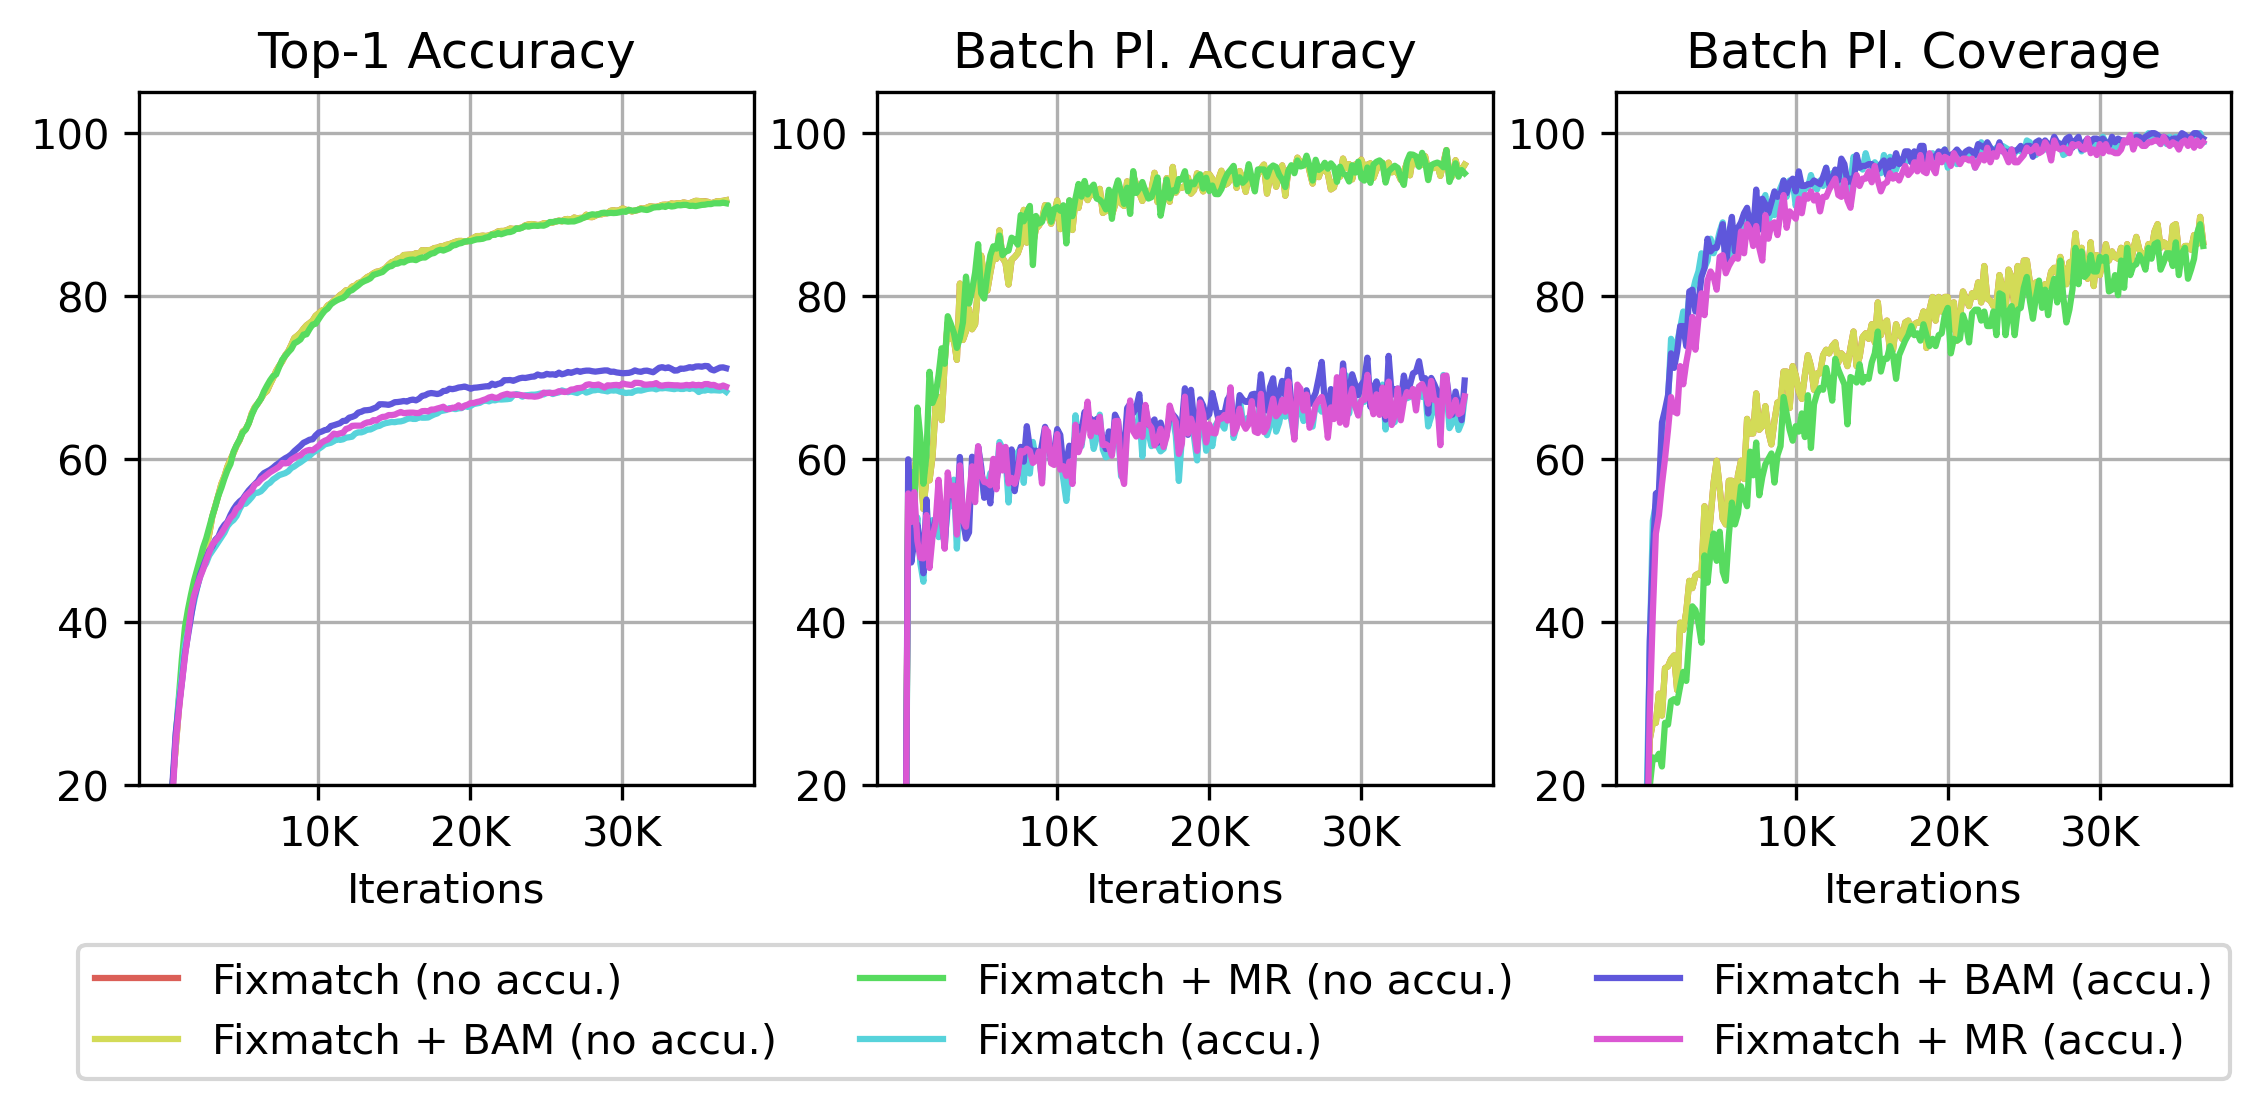

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
sns.lineplot(
    data=df_top1_fixmatch,
    x="step",
    y="value",
    hue="method",
    ax=axes[0],
    palette="hls",
)
axes[0].set_title("Top-1 Accuracy")
sns.lineplot(
    data=df_batch_pl_acc_fixmatch,
    x="step",
    y="value",
    hue="method",
    ax=axes[1],
    palette="hls",
)
axes[1].set_title("Batch Pl. Accuracy")
sns.lineplot(
    data=df_batch_pl_cov_fixmatch,
    x="step",
    y="value",
    hue="method",
    ax=axes[2],
    palette="hls",
)
axes[2].set_title("Batch Pl. Coverage")
for ax in axes.flatten():
    ax.grid(True)
    ax.set_ylim(20, 105)
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_xticks([10000, 20000, 30000])
    ax.set_xticklabels(["10K", "20K", "30K"])
    ax.legend().set_visible(False)
    ax.set_ylabel("")
    ax.set_xlabel("Iterations")

rename_map = {
    "fixmatchFalse": "Fixmatch (no accu.)",
    "fixmatchTrue": "Fixmatch (accu.)",
    "freematchFalse": "Freematch (no accu.)",
    "freematchTrue": "Freematch (accu.)",
    "fixmatch-mrFalse": "Fixmatch + MR (no accu.)",
    "fixmatch-mrTrue": "Fixmatch + MR (accu.)",
    "freematch-mrFalse": "Freematch + MR (no accu.)",
    "freematch-mrTrue": "Freematch + MR (accu.)",
    "fixmatch-bamFalse": "Fixmatch + BAM (no accu.)",
    "fixmatch-bamTrue": "Fixmatch + BAM (accu.)",
    "freematch-bamFalse": "Freematch + BAM (no accu.)",
    "freematch-bamTrue": "Freematch + BAM (accu.)",
}

handles, labels = axes[0].get_legend_handles_labels()
new_labels = [rename_map[label] for label in labels]
axes[0].legend(
    handles, new_labels, loc="upper center", bbox_to_anchor=(1.65, -0.2), ncol=3
)

plt.tight_layout()
plt.savefig("cifar10_fixmatch_accumulation.pdf", bbox_inches="tight")
plt.show()

/tmp/ipykernel_2235921/2735257497.py:61: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


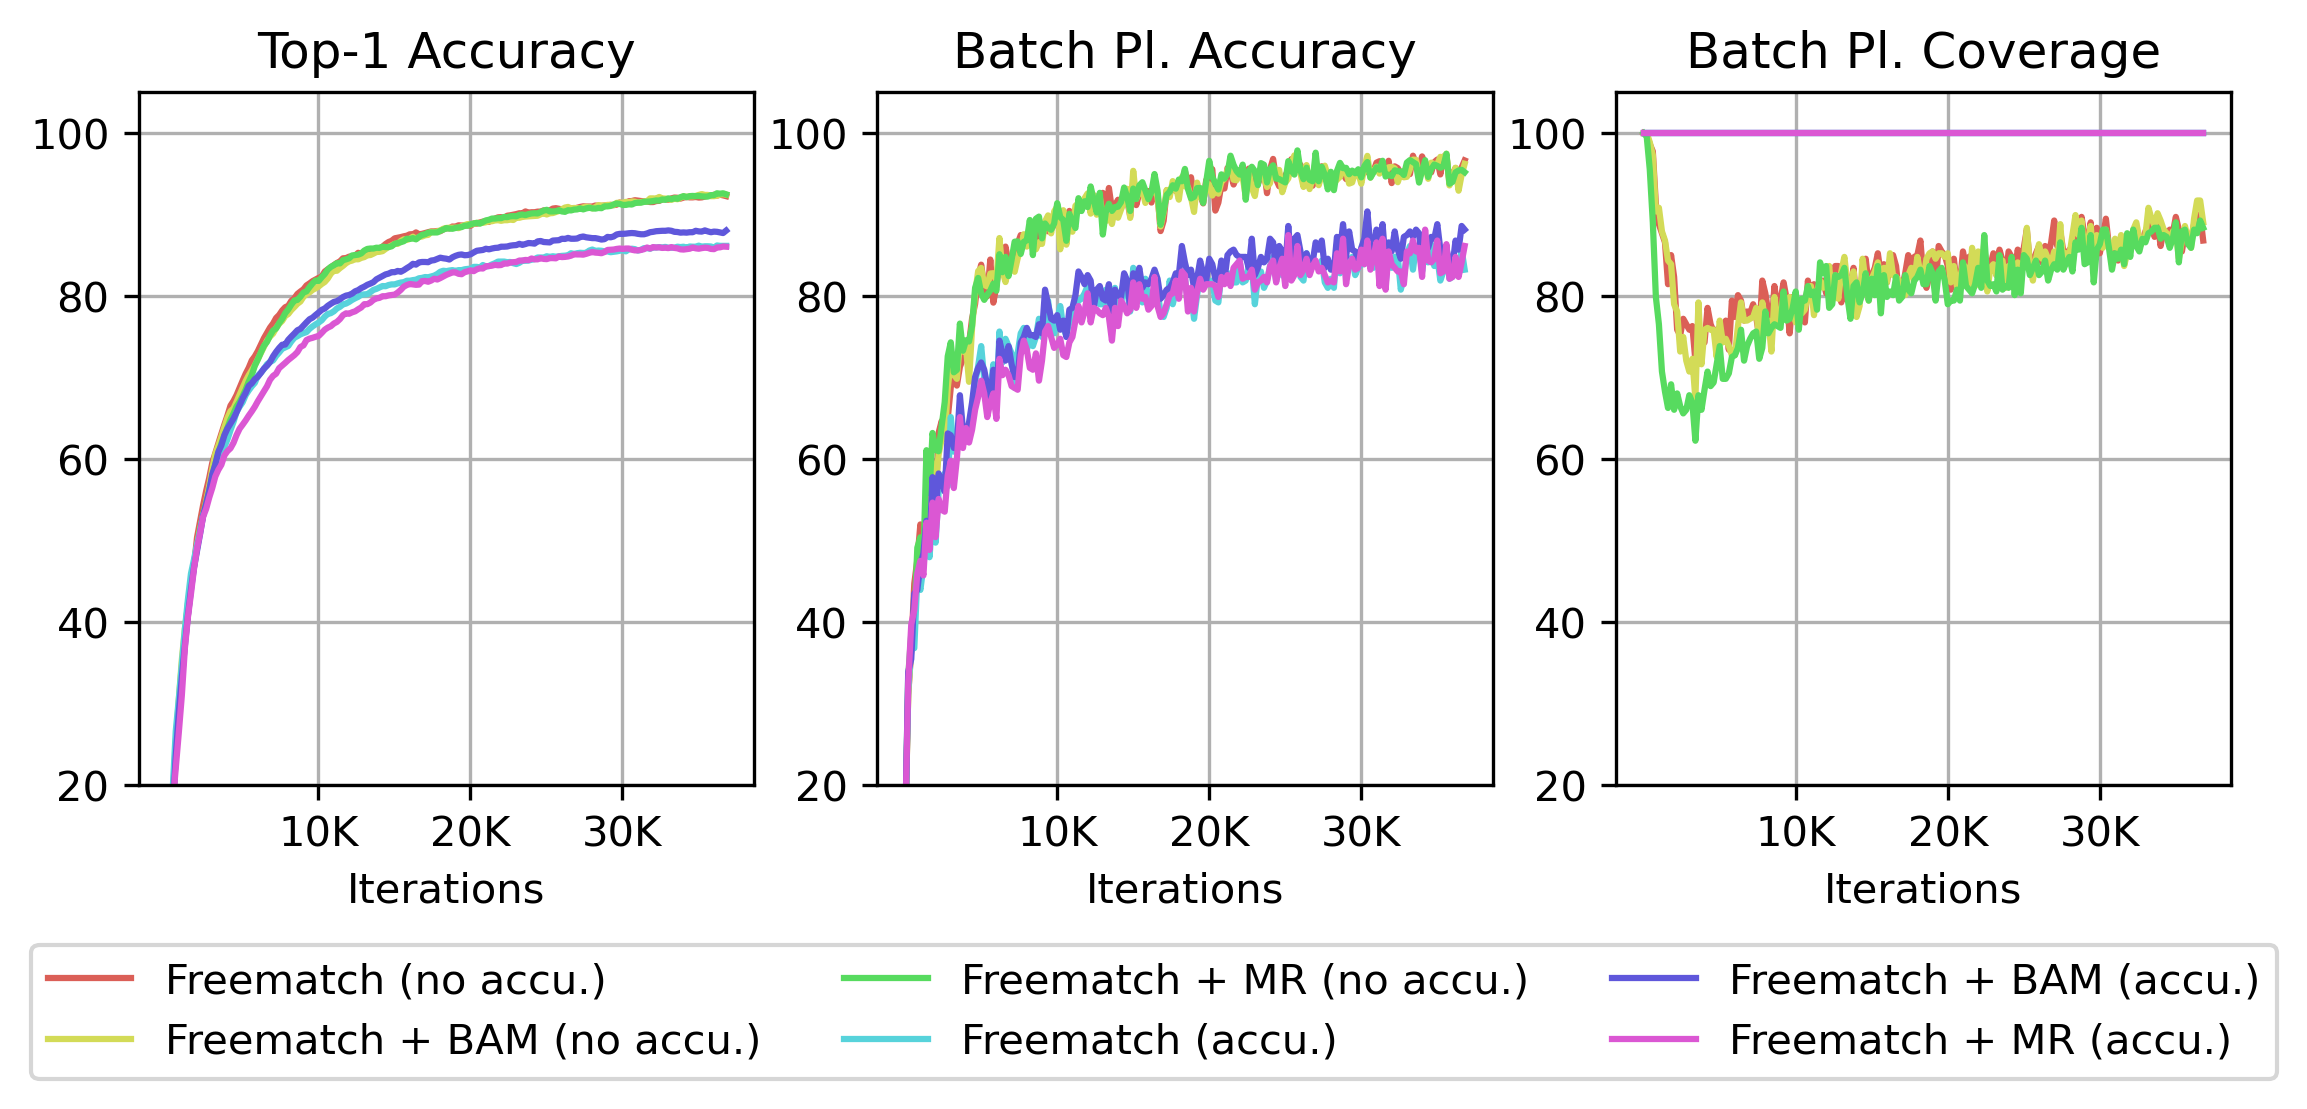

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
sns.lineplot(
    data=df_top1_freematch,
    x="step",
    y="value",
    hue="method",
    ax=axes[0],
    palette="hls",
)
axes[0].set_title("Top-1 Accuracy")
sns.lineplot(
    data=df_batch_pl_acc_freematch,
    x="step",
    y="value",
    hue="method",
    ax=axes[1],
    palette="hls",
)
axes[1].set_title("Batch Pl. Accuracy")
sns.lineplot(
    data=df_batch_pl_cov_freematch,
    x="step",
    y="value",
    hue="method",
    ax=axes[2],
    palette="hls",
)
axes[2].set_title("Batch Pl. Coverage")
for ax in axes.flatten():
    ax.grid(True)
    ax.set_ylim(20, 105)
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_xticks([10000, 20000, 30000])
    ax.set_xticklabels(["10K", "20K", "30K"])
    ax.legend().set_visible(False)
    ax.set_ylabel("")
    ax.set_xlabel("Iterations")

rename_map = {
    "fixmatchFalse": "Fixmatch (no accu.)",
    "fixmatchTrue": "Fixmatch (accu.)",
    "freematchFalse": "Freematch (no accu.)",
    "freematchTrue": "Freematch (accu.)",
    "fixmatch-mrFalse": "Fixmatch + MR (no accu.)",
    "fixmatch-mrTrue": "Fixmatch + MR (accu.)",
    "freematch-mrFalse": "Freematch + MR (no accu.)",
    "freematch-mrTrue": "Freematch + MR (accu.)",
    "fixmatch-bamFalse": "Fixmatch + BAM (no accu.)",
    "fixmatch-bamTrue": "Fixmatch + BAM (accu.)",
    "freematch-bamFalse": "Freematch + BAM (no accu.)",
    "freematch-bamTrue": "Freematch + BAM (accu.)",
}

handles, labels = axes[0].get_legend_handles_labels()
new_labels = [rename_map[label] for label in labels]
axes[0].legend(
    handles, new_labels, loc="upper center", bbox_to_anchor=(1.65, -0.2), ncol=3
)


plt.tight_layout()
plt.savefig("cifar10_freematch_accumulation.pdf", bbox_inches="tight")
plt.show()